In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import nltk
import matplotlib.pyplot as plt
import re
import sys
import os
import seaborn as sns
print(os.getcwd())   # Prints the current working directory

C:\Users\user\Desktop\Data Scientist


In [2]:
import nltk
from nltk.corpus import stopwords  #Stop words
nltk.download('stopwords');
stop = stopwords.words('english')
from nltk.tokenize import word_tokenize  #tokenize

from nltk.stem import PorterStemmer 
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Provide the new path here

df = pd.read_excel('News Title.xls')
df = df[["News Title", "Category"]]

In [4]:
df.head(5)

,News Title,Category
0,Google+ rolls out 'Stories' for tricked out ph...,Technology
1,Dov Charney's Redeeming Quality,Business
2,White God adds Un Certain Regard to the Palm Dog,Entertainment
3,"Google shows off Androids for wearables, cars,...",Technology
4,China May new bank loans at 870.8 bln yuan,Business


In [5]:
def stemming(sentence):
    count1 = 0
    stem_sentence = []
    for g in sentence:
        count1 = count1 + 1 ##List 
        stem_sentence.insert(count1, ps.stem(g))
    return stem_sentence

In [6]:
##Preprocessing 
df['News Title'] = df['News Title'].map(lambda x: re.sub(r'[^A-Za-z0-9]+', ' ', x))        # remove special character including emoji
df['News Title'] = df['News Title'].str.lstrip()                                           # remove whitespace,newline,tab,basically everything from the start of string
df['News Title'] = df['News Title'].str.rstrip()                                           # remove whitespace,newline,tab,basically everything from the end of string
df['News Title'] = df['News Title'].str.lower()                                            # lowercase

##Stopword
df['News Title'] = df['News Title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

## Tokenize + Stemming + convert to list again
df['News Title2'] = df['News Title'].apply(lambda x : word_tokenize(x))
df['News Title3'] = df['News Title2'].apply(lambda x : stemming(x))
df['News Title4'] = df['News Title3'].apply(lambda x :  " ".join(x))

In [7]:
df.to_csv('result_prepro_news_title.csv')

In [8]:
df.head(5)

,News Title,Category,News Title2,News Title3,News Title4
0,google rolls stories tricked photo playback,Technology,"[google, rolls, stories, tricked, photo, playb...","[googl, roll, stori, trick, photo, playback]",googl roll stori trick photo playback
1,dov charney redeeming quality,Business,"[dov, charney, redeeming, quality]","[dov, charney, redeem, qualiti]",dov charney redeem qualiti
2,white god adds un certain regard palm dog,Entertainment,"[white, god, adds, un, certain, regard, palm, ...","[white, god, add, un, certain, regard, palm, dog]",white god add un certain regard palm dog
3,google shows androids wearables cars tvs,Technology,"[google, shows, androids, wearables, cars, tvs]","[googl, show, android, wearabl, car, tv]",googl show android wearabl car tv
4,china may new bank loans 870 8 bln yuan,Business,"[china, may, new, bank, loans, 870, 8, bln, yuan]","[china, may, new, bank, loan, 870, 8, bln, yuan]",china may new bank loan 870 8 bln yuan


In [9]:
#TF-IDF Methods (Uni-gram)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_unigram = TfidfVectorizer(ngram_range=(1,1)) 


In [11]:
vectors_unigram = tfidf_unigram.fit_transform(df['News Title4'].values.astype('U'))


In [12]:
feature_names_unigram = tfidf_unigram.get_feature_names()
print(len(feature_names_unigram))


20023


In [13]:
def category_to_integer(category) :
    if(category == "Business"):
        return 0
    elif(category == "Entertainment"):
        return 1
    elif(category == "Medical"):
        return 2    
    elif(category == "Technology"):
        return 3

In [15]:
# Creating Multi label Class

df['Class3'] = df['Category'].apply(lambda x: category_to_integer(x))
output = df['Class3'].to_numpy()

In [16]:
df.head(5)

,News Title,Category,News Title2,News Title3,News Title4,Class3
0,google rolls stories tricked photo playback,Technology,"[google, rolls, stories, tricked, photo, playb...","[googl, roll, stori, trick, photo, playback]",googl roll stori trick photo playback,3
1,dov charney redeeming quality,Business,"[dov, charney, redeeming, quality]","[dov, charney, redeem, qualiti]",dov charney redeem qualiti,0
2,white god adds un certain regard palm dog,Entertainment,"[white, god, adds, un, certain, regard, palm, ...","[white, god, add, un, certain, regard, palm, dog]",white god add un certain regard palm dog,1
3,google shows androids wearables cars tvs,Technology,"[google, shows, androids, wearables, cars, tvs]","[googl, show, android, wearabl, car, tv]",googl show android wearabl car tv,3
4,china may new bank loans 870 8 bln yuan,Business,"[china, may, new, bank, loans, 870, 8, bln, yuan]","[china, may, new, bank, loan, 870, 8, bln, yuan]",china may new bank loan 870 8 bln yuan,0


In [17]:
#Variable Input , output and number of neurons for ANN
# Split Train and test 80-20 % ratio
row_train_end = round(vectors_unigram.shape[0] * 0.8)
row_test_end = vectors_unigram.shape[0]

# Unigram
input_unigram_training = vectors_unigram[0:row_train_end]                #80%
output_unigram_training = output[0:row_train_end]                        #80%
input_unigram_testing = vectors_unigram [row_train_end:row_test_end]     #20%
output_unigram_testing = output[row_train_end:row_test_end]              #20%

In [18]:
## SGD-based methods (Linear SVM)

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn import metrics


sgd = SGDClassifier(random_state = 42)
sgd.fit(input_unigram_training, output_unigram_training)
sgdSVM_pred = sgd.predict(input_unigram_testing)

print('accuracy %s' % accuracy_score(sgdSVM_pred, output_unigram_testing))

accuracy 0.9110399023422598


In [20]:
## Confusion Matrix

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(labels, predictions):
  cm = confusion_matrix(labels, predictions)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

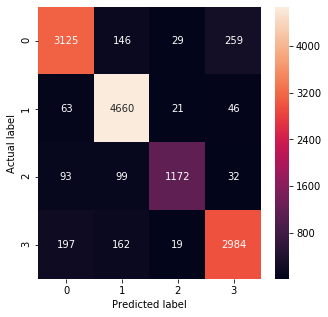

In [22]:
plot_cm(output_unigram_testing, sgdSVM_pred)
#Accuracy = 0.910

#Label 0 
#TP = 3125
#FN = (146 + 29 + 259) = 434
#FP = (63 + 93 + 197) = 353
#TN = (4660 + 21 + 46 + 99 + 1172 +32+162+19+ 2984) = 9195
#accuracy = 0.93

#Label 1 
#TP = 4660
#FN = (63 + 21 + 46) = 130
#FP = (146 + 99 + 162) = 407
#TN = (3125 + 29 + 259 + 93 + 1172 + 32 + 197 + 19 + 2984) = 7910
#accuracy = 0.95

#Label 2 
#TP = 1172
#FN = (93 + 99 + 32) = 224
#FP = (29 + 21 + 19) = 69
#TN = (3125 + 146 + 259 + 63 + 4660 + 46 + 197 + 162 + 2984) = 11642
#accuracy = 0.977

#Label 3 
#TP = 2984
#FN = (197 + 162 + 19) = 378
#FP = (259 + 46 + 32) = 337
#TN = (3125 + 146 + 29 + 63 + 4660 + 21 + 93 + 99 + 1172) = 9408 
#accuracy = 0.94


In [23]:
print(output_unigram_testing.size)

13107


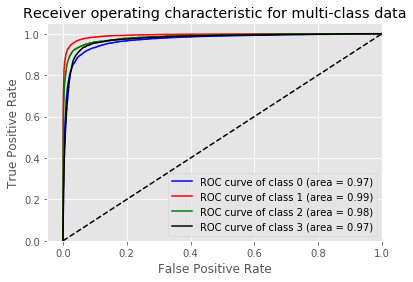

In [24]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
plt.style.use('ggplot')


X = vectors_unigram  


# Binarize the output

y = label_binarize(output, classes=[0, 1, 2, 3])

n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)


classifier = OneVsRestClassifier(SGDClassifier(random_state = 42))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
#     fpr[i], tpr[i], _ = roc_curve(output_unigram_testing[:, i], sgdSVM_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green','black'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [25]:
print(output_unigram_testing.shape)
print(sgdSVM_pred.shape)

(13107,)
(13107,)
